# ISTA 322 Intro to Google Colab

> Welcome to your first Jupyter Notebook of the course!  This is intended to be used via Google Colaboratory as it has most of the libraries we need preinstalled.  It's totally cloud based so it spins up a VM every time you open it.  If you're curious how it works and the resources it offers check out the [FAQ](https://research.google.com/colaboratory/faq.html).

> You're welcome to go and just install Jupyter on your local machine.  You'll likely have more power that way, but you also will have to make sure you are able to install all the necessary libraries that we'll be using on your own.  I will provide support to make Colabratory work, but not local installs... you gotta do your own googling there!

> The goal of this notebook is just to get everyone on the same page with Python. If people took my ESOC 214 class then you've done some of these actions in R.  If you only had ISTA 116 then this might be totally new to you. This isn't data engineering per-se, but it is laying the groundwork for different types of transforms.  So, if this is easy, then you get some more practice.  If it isn't, then really dig in and make sure you learn this stuff!



## Let's start by loading in some libraries and then data
 
> The assumption of this course is that you've taken one class using Python 3.  These basic libraries should be familiar to you from previous classes.  The nice part about Colab is that the majority of common libraries are already installed so you  just have to import and alias them. 
 
> **Note: **Later we'll learn how to permanently install external libraries as well as mount your google drive so you can access and save files.  No need for that now, though!
 
> Let's get started!  For those of you who haven't used a Jupyter Notebook they're pretty simple.  To run cells just highlight/click into a cell and hit CTRL+Enter or Shift+Enter.  You can add cells if you just hover near the bottom of one and click the 'code' box.  

In [1]:
# Start by importing pandas, numpy, and matplotlib
# If you're new to python you'll also notice that I'm saying 'as' and then giving a shorter name such as 'pd'.
# This aliasing is really common as you don't want to have to type out full paths to libraries every time  you use them.
# You can alias using any name, but there are common conventions for most that we'll be sticking to. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Bring in hourly aggregates of NYC taxi ride data - this is the type thing DE's work to create

# We'll use panda's read_csv function. We first call our pandas library via pd
# Then we call the function read_csv()
# Note that we're just pulling in a CSV file from the web

rides = pd.read_csv("https://docs.google.com/spreadsheets/d/1tHArxAroG14mKf-AHjdvYsXhaXI5nE08bUUW4UDHCRw/gviz/tq?tqx=out:csv")

## Just some quick exploring of our rides data

Assuming you didn't get an error, the first thing we should always do is some quick exploration of our data.  This is to make sure it is what we think it is before digging in more.  Look at the number of rows, columns, what they contained at a high level, etc. 


In [3]:
# Get the dimensions - 8670 rows, 8 columns
rides.shape
# Note, you can get either the number of rows or column using square brackets
# e.g. rides.shape[0] gets the first position... remember indexing in python starts at zero!
# rides.shape[1] will grab the second

(8760, 8)

In [4]:
# Get the first five rows to look at the raw data
rides.head()

,obs,hour,total_passengers,mean_passenger_count,mean_trip_time,mean_distance,mean_fare,mean_tip
0,1,2018-01-01 0:00:00,28630,1.739580,17.239386,2.754618,12.621758,1.617691
1,2,2018-01-01 1:00:00,32778,1.726521,18.515281,2.957461,12.864467,1.727244
2,3,2018-01-01 2:00:00,27966,1.688666,18.065338,3.083759,12.988859,1.723989
3,4,2018-01-01 3:00:00,21243,1.684482,17.502142,3.167346,12.950800,1.631373
4,5,2018-01-01 4:00:00,14822,1.698602,18.254007,3.562889,13.898338,1.520717


So what can we learn from our data just looking at the first five rows?

- Well, it looks like we have data that has been aggregated by hour intervals.  The hour column are dates along with times that grow by an hour each row.  

- The aggregation looks to be about average features of taxi rides in that hour.  

- I'd say that most of the data make sense so far, but we're only seeing five of 8760 rows, so there could still be issues. 



In [5]:
# Get a some summary statistics
rides.describe()

,obs,total_passengers,mean_passenger_count,mean_trip_time,mean_distance,mean_fare,mean_tip
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4380.500000,18716.562671,1.591968,16.614130,3.156375,13.377344,1.853594
std,2528.938512,8961.120977,0.053635,30.288910,0.642236,4.422060,0.231873
min,1.000000,3.000000,1.297562,-2712.216360,1.818509,8.397816,1.124044
25%,2190.750000,11464.500000,1.554646,15.048474,2.724941,12.328013,1.687558
50%,4380.500000,21502.500000,1.587136,16.665912,2.996647,13.078520,1.868333
75%,6570.250000,25180.500000,1.631410,18.655940,3.386168,13.975809,2.006602
max,8760.000000,38420.000000,1.773838,91.992934,16.392558,330.098643,3.683238


`describe()` lets us learn more at a high level.  It's not the raw data but instead gives summary statistics of the data.  `describe()` should be used *with* `head()` to get both detailed and high level views.  From this we can see a couple issues.  

- The major one is that the max mean values are really high.  The means and even 75% quartile all look fine, though.  But a  mean triptime within an hour of 92 minutes seems really high, as does the mean fare of 330.  I guess it could happen, but we'd want to explore more to figure out if this is realistic.

- The minimum average trip time is negative 2712 which is clearly an error.  

Remember that these are means and totals calculated for hour intervals  from individual ride data.  Ideally the data engineer would have cleaned the raw data before this stage.  Given that data engineer was me I'll yell at myself later.  

Also, it's worth pointing out that it's useful to use both `describe()`  and `head()`.  `head()` is good to see the raw data, but won't give you summary statistics that tell you if you might have outliers or errors.  `describe()` does let you see those things but will only work on numeric datatypes and leaves out strings (e.g. hour). 

In [11]:
# What are the datatypes?
rides.dtypes

obs                       int64
hour                     object
total_passengers          int64
mean_passenger_count    float64
mean_trip_time          float64
mean_distance           float64
mean_fare               float64
mean_tip                float64
dtype: object

Overall these look good.  We see integers where there should be integers, and floats where there should be floats.
 
- The only issue is that our `hour` column is an object datatype.  Object datatypes are just a generic datatype that contains mixed numeric and non-numeric values.  We saw when we called `head()` that the hour column contained numbers as well as some slashes and colons.  We'll want to convert that to a datetime and play with other conversions in a bit.

In [10]:
# Can you call some of these functions on indivdiual columns? 

## Converting datatypes

Here we'll convert a couple columns to some different datatypes.  Not going to cover them all, but I just want you to see the general syntax used.  

In [12]:
# Given that hour column needs to be converted we'll start there.  
# Just to refresh, you call can call a column from a dataframe using the syntax 'df_name['column_name']
# Watch
rides['hour']

0        2018-01-01 0:00:00
1        2018-01-01 1:00:00
2        2018-01-01 2:00:00
3        2018-01-01 3:00:00
4        2018-01-01 4:00:00
               ...         
8755    2018-12-31 19:00:00
8756    2018-12-31 20:00:00
8757    2018-12-31 21:00:00
8758    2018-12-31 22:00:00
8759    2018-12-31 23:00:00
Name: hour, Length: 8760, dtype: object

In [13]:
# Pandas has the to_datetime() which does exactly what you think it does... converts columns to datetimes
# Remember we aliased pandas as pd.  Need to call the package then the function
pd.to_datetime(rides['hour'])

0      2018-01-01 00:00:00
1      2018-01-01 01:00:00
2      2018-01-01 02:00:00
3      2018-01-01 03:00:00
4      2018-01-01 04:00:00
               ...        
8755   2018-12-31 19:00:00
8756   2018-12-31 20:00:00
8757   2018-12-31 21:00:00
8758   2018-12-31 22:00:00
8759   2018-12-31 23:00:00
Name: hour, Length: 8760, dtype: datetime64[ns]

In [14]:
# Cool, so we can see that it says the dtype is a datetime.  
# Obviously we need to assign that to our dataframe to be useful, so let's do that
rides['hour'] = pd.to_datetime(rides['hour'])

In [15]:
# Give a quick check of our datatypes to confirm. 
rides.dtypes

obs                              int64
hour                    datetime64[ns]
total_passengers                 int64
mean_passenger_count           float64
mean_trip_time                 float64
mean_distance                  float64
mean_fare                      float64
mean_tip                       float64
dtype: object

In [16]:
# What's great about datetimes is that you can treat them as numbers
# This is key to checking for errors, defining intervals, calculating intervals. etc.
# For example, what's the earliest date in our dataset?
rides['hour'].min()

Timestamp('2018-01-01 00:00:00')

In [17]:
# What's the total timespan of our data? 
rides['hour'].max() - rides['hour'].min()

Timedelta('364 days 23:00:00')

### Converting numerics

Let's just quickly convert one of the float columns to an integer just so you can see another datatype conversion.  We'll convert mean passenger count as it might make more sense to present that as integers.  

In [18]:
# For other datatypes you can use the .astype() function.  
# You call the astype() function and specify what datatype you want to convert it to.
# Here we use int for integer, but you could change to whatever if you wanted
rides['mean_passenger_count'].astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
8755    1
8756    1
8757    1
8758    1
8759    1
Name: mean_passenger_count, Length: 8760, dtype: int64

In [19]:
# Note that in integer conversion it just chops off the decimal.  It doesn't round. 
# You can also see that it converted it to an integer based on the dtype in the output.
# Let's do that again but now add it to our dataframe in a new column called 'mean_pass_int'
rides['mean_pass_int'] = rides['mean_passenger_count'].astype(int)

In [20]:
# Check 
rides.dtypes

obs                              int64
hour                    datetime64[ns]
total_passengers                 int64
mean_passenger_count           float64
mean_trip_time                 float64
mean_distance                  float64
mean_fare                      float64
mean_tip                       float64
mean_pass_int                    int64
dtype: object

## Making a binary column

We talked about how you'll frequently want to convert a variable into a 0/1 binary column.  Let's make one new column that contains a 1 if the number of passengers in that hour is greater than 25000 and zero if it's less than that.  We'll call this new column 'peak' for if it's a peak time in terms of passengers. 

In [21]:
# We can use numpy's where() function to do this.  
# You just specify the column and the comparison in the first position.
# The second position is what you what the value to be if the condition is met.
# The third is if the condition is not met.
# This is saying 'numpy, anywhere you see the total number of passengers in the rides dataframe is greater than 25000...`
# that should be a 1, if it's not then a 0

np.where(rides['total_passengers'] >= 25000, 1, 0)

array([1, 1, 1, ..., 0, 0, 0])

In [22]:
# This idea of checking for truth underlies this.  
# If we run just the comparison we can see this. 
# Where's there's a 1 in the array above there's a True here
rides['total_passengers'] >= 25000

0        True
1        True
2        True
3       False
4       False
        ...  
8755     True
8756     True
8757    False
8758    False
8759    False
Name: total_passengers, Length: 8760, dtype: bool

In [23]:
# OK, let's just add that to a new column now. 

rides['peak'] = np.where(rides['total_passengers'] >= 25000, 1, 0)

In [24]:
# Quick check with head looks good
# I also am grabbing the mean of this new column which will tell me the percentative of observations that are at peak
# Finally by wrapping print around both it'll display both operations
# Without print it'll just display the last.  
# Nice if you want fewer code blocks. 
print(rides.head())
print(rides['peak'].mean())

   obs                hour  total_passengers  mean_passenger_count  \
0    1 2018-01-01 00:00:00             28630              1.739580   
1    2 2018-01-01 01:00:00             32778              1.726521   
2    3 2018-01-01 02:00:00             27966              1.688666   
3    4 2018-01-01 03:00:00             21243              1.684482   
4    5 2018-01-01 04:00:00             14822              1.698602   

   mean_trip_time  mean_distance  mean_fare  mean_tip  mean_pass_int  peak  
0       17.239386       2.754618  12.621758  1.617691              1     1  
1       18.515281       2.957461  12.864467  1.727244              1     1  
2       18.065338       3.083759  12.988859  1.723989              1     1  
3       17.502142       3.167346  12.950800  1.631373              1     0  
4       18.254007       3.562889  13.898338  1.520717              1     0  
0.2602739726027397


## Making a quick visualization

> Let's take a minute and just make a quick visualization.  It's not something we'll need to do a ton of, but being able to do simple viz is key to understanding data.  


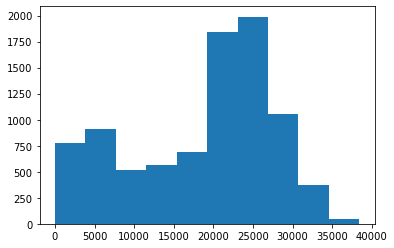

In [25]:
# We'll start with a histogram of total passengers
# You need to call the alias for matplotlib - plt
plt.hist(x = rides['total_passengers']) # feed plt.hist() the column you want to plot
plt.show() # And then show it!

I'd say that looks pretty good.  No negatives which is good. There are two humps which probably relate to the very peak times of rush hour and then then the very slow times of really early in the morning.  

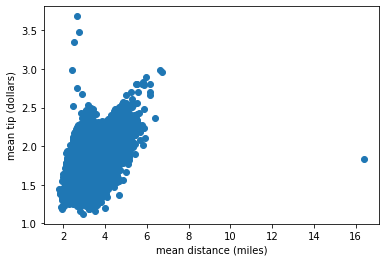

In [26]:
# Let's now make a scatterplot of how distance relates to tip
# We'll spice this plot up with some axis labels
plt.scatter(x = rides['mean_distance'], y = rides['mean_tip']) # scatterplot
plt.xlabel('mean distance (miles)') # give x label
plt.ylabel('mean tip (dollars)') # give y label
plt.show() 

Not all that surprising that as the distance goes up, people tip more.   

There are still those outliers that we became aware of earlier in the lesson.  You'd have a couple options here.  Cut them out and move on, or go back and fix the original process that created the errors.  Maybe it was only a single ride within that hour which skewed the whole thing.  So ideally you would catch this in the initial transform step!


## Data Structures

Let's now take a bit to play with some lists, and dictionaries. We'll make some generic data and then convert them to dataframes so you can start to get a feel for how they work. 

### Lists first

In [27]:
# lists are easy to make.  Let's take the examples from the slidedeck

test_scores = [67, 49, 88, 95, 77]
study_time = [35, 14, 75, 89, 68]
school_year = ['fr', 'jr', 'sr', 'sr', 'fr']

In [28]:
# You can select positions from a list using indexing.  
# Let's get the 3rd entry in test_scores
# Remember python indexes from 0
test_scores[2]

88

In [29]:
# And select ranges.  
# Remember that the starting value is inclusive but the end is exclusive
test_scores[2:4]

[88, 95]

In [30]:
# You can add on to the end of lists using .append()
test_scores.append(109)
test_scores
# There are lots of different functions/methods that can be applied to lists. 
# Just wanted to show you one as a reminder. 

[67, 49, 88, 95, 77, 109]

In [31]:
# And replace values by specifying an index position and telling what you want to insert
test_scores[5] = 100
test_scores

[67, 49, 88, 95, 77, 100]

In [32]:
# Let's turn the original three lists into a dataframe

test_scores = [67, 49, 88, 95, 77]
study_time = [35, 14, 75, 89, 68]
school_year = ['fr', 'jr', 'sr', 'sr', 'fr']

# Then you can take the pandas DataFrame() function.  First argument is the data, second the column names
# Here we are using the zip function to structure the data.  Play around with what happens when you don't use that.
# columns just says what you want the column names to be
score_df = pd.DataFrame(list(zip(test_scores, study_time, school_year)), 
                        columns=['test_scores', 'study_time', 'school_year'])
score_df


,test_scores,study_time,school_year
0,67,35,fr
1,49,14,jr
2,88,75,sr
3,95,89,sr
4,77,68,fr


In [33]:
# Yep, it's a data frame
type(score_df)

pandas.core.frame.DataFrame

### Dictionaries

In [34]:
# We can make a couple dictionaries with descriptors of myself and my brother
nick_dict = {'name' : 'nick', 'height' : 75, 'weight' : 245, 'hair' : 'black'}
tony_dict = {'name' : 'tony', 'height' : 73, 'weight' : 200, 'hair' : 'brown'}

In [35]:
# Easy to make into a dataframe given the keys will be used as column names
sibs_df = pd.DataFrame([nick_dict, tony_dict])
sibs_df

,name,height,weight,hair
0,nick,75,245,black
1,tony,73,200,brown


In [36]:
# One thing that can make things move faster when it comes to searching in a dataframe is setting an index
# Indexes must be unique values
# Here I'm going to set the 'name' column to the index
sibs_df = sibs_df.set_index('name')

In [37]:
# You can then search based on that unique index value
# Obviously it takes no time when there's only two rows
# But it's much faster when you have larger datasets.  
sibs_df.loc['nick']

height       75
weight      245
hair      black
Name: nick, dtype: object

## JSON files

To end let's just take a minute to load in a json file

In [38]:
# We need a couple libraries to do this
import requests

In [39]:
# First we'll use requests to get a url
# That gets response object from the link
url = 'https://gist.githubusercontent.com/hrp/900964/raw/2bbee4c296e6b54877b537144be89f19beff75f4/twitter.json'
twitter_json_obj = requests.get(url)
twitter_json_obj

<Response [200]>

In [40]:
# Then we can decode that json with the json() function
twitter_json = twitter_json_obj.json()

In [41]:
# Note that this is a dictionary!
type(twitter_json)

dict

In [42]:
# Let's look at the whole thing
twitter_json

{'text': 'RT @PostGradProblem: In preparation for the NFL lockout, I will be spending twice as much time analyzing my fantasy baseball team during ...',
 'truncated': True,
 'in_reply_to_user_id': None,
 'in_reply_to_status_id': None,
 'favorited': False,
 'source': '<a href="http://twitter.com/" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id_str': None,
 'id_str': '54691802283900928',
 'entities': {'user_mentions': [{'indices': [3, 19],
    'screen_name': 'PostGradProblem',
    'id_str': '271572434',
    'name': 'PostGradProblems',
    'id': 271572434}],
  'urls': [],
  'hashtags': []},
 'contributors': None,
 'retweeted': False,
 'in_reply_to_user_id_str': None,
 'place': None,
 'retweet_count': 4,
 'created_at': 'Sun Apr 03 23:48:36 +0000 2011',
 'retweeted_status': {'text': 'In preparation for the NFL lockout, I will be spending twice as much time analyzing my fantasy baseball team during company time. #PGP',
  'truncated': False,


In [43]:
# So that's a pretty huge set of key:value pairs.
# Some are even nested.
# Let's say you want just the user information.  
# That's at the top level so we can just ask for the following
twitter_json['user']

{'notifications': None,
 'profile_use_background_image': True,
 'statuses_count': 351,
 'profile_background_color': 'C0DEED',
 'followers_count': 48,
 'profile_image_url': 'http://a1.twimg.com/profile_images/455128973/gCsVUnofNqqyd6tdOGevROvko1_500_normal.jpg',
 'listed_count': 0,
 'profile_background_image_url': 'http://a3.twimg.com/a/1300479984/images/themes/theme1/bg.png',
 'description': 'watcha doin in my waters?',
 'screen_name': 'OldGREG85',
 'default_profile': True,
 'verified': False,
 'time_zone': 'Hawaii',
 'profile_text_color': '333333',
 'is_translator': False,
 'profile_sidebar_fill_color': 'DDEEF6',
 'location': 'Texas',
 'id_str': '80177619',
 'default_profile_image': False,
 'profile_background_tile': False,
 'lang': 'en',
 'friends_count': 81,
 'protected': False,
 'favourites_count': 0,
 'created_at': 'Tue Oct 06 01:13:17 +0000 2009',
 'profile_link_color': '0084B4',
 'name': 'GG',
 'show_all_inline_media': False,
 'follow_request_sent': None,
 'geo_enabled': False,


In [44]:
#To drill down further you just use another set of brackets.
#Let's get the user ID from within user.
twitter_json['user']['id']

80177619

In [45]:
# What's in entities?
twitter_json['entities']

{'user_mentions': [{'indices': [3, 19],
   'screen_name': 'PostGradProblem',
   'id_str': '271572434',
   'name': 'PostGradProblems',
   'id': 271572434}],
 'urls': [],
 'hashtags': []}

In [46]:
# Let's see if we can grab the username of who the user is mentioning
twitter_json['entities']['user_mentions'][0]['screen_name']

'PostGradProblem'

So that worked!  One tricky thing - In this case screen name was in a dictionary that was inside a list.  So I had to call up the first position of that list of values associated with the `user_mentions` by using `[0]`.  Then I was able to select values by keys again.  

We'll be doing more of this later, but for now I hope you can start to see how given a bunch of JSON data you could extract the relevant columns, store them in a list and then make an easy to use dataframe. 

# Wrapping up

Don't worry if you didn't get every single thing in this lesson. Again, it's more to just reorient everyone with some python basics while also building a bit of a foundation that we'll carry on into the following weeks.  We'll be dedicating whole weeks just to transforms and working with JSON data, so any confusion will be clarified then.  